# Capstone 2 -- Preprocessing and Training Data Development
**[Online Retail II](https://archive.ics.uci.edu/dataset/502/online+retail+ii)**

## Imports and Defaults

**Import Libraries**

In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib as plt
import seaborn as sns

**Set Default Preferences**

In [3]:
# display all columns
pd.set_option('display.max_columns', None)

# surpress scientific notation
pd.options.display.float_format = '{:}'.format

**Import Data** 

In [36]:
# import rfm df
path = '../Data/rfm.csv'
rfm = pd.read_csv(path)

In [37]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5878 entries, 0 to 5877
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  5878 non-null   float64
 1   Recency      5878 non-null   int64  
 2   Frequency    5878 non-null   int64  
 3   Monetary     5878 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 183.8 KB


Reload rfm with correct dtype

In [38]:
#reload
path = '../Data/rfm.csv'
dtype_dict= {'Recency': 'int32',
               'Frequency': 'int32',
               'Monetary': 'float32'}
rfm = pd.read_csv(path, dtype= dtype_dict, index_col='Customer ID')

In [39]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5878 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    5878 non-null   int32  
 1   Frequency  5878 non-null   int32  
 2   Monetary   5878 non-null   float32
dtypes: float32(1), int32(2)
memory usage: 114.8 KB


In [12]:
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,326,12,77556.4609375
12347.0,2,8,4921.52978515625
12348.0,75,5,2019.4000244140625
12349.0,19,4,4428.68994140625
12350.0,310,1,334.3999938964844


### Train Test Split

In [42]:
rfm_train, rfm_test = train_test_split(rfm, test_size=0.2, random_state=25)

### Pre Processing - Transform and Scale

In [55]:
# Transform Train data
power_transformer = PowerTransformer(method='box-cox')
rfm_train_transformed = power_transformer.fit_transform(rfm_train)

# Scale Train data
scaler = StandardScaler()
rfm_train_scaled = scaler.fit_transform(rfm_train_transformed)

In [56]:
# Transform test data
rfm_test_transformed = power_transformer.transform(rfm_test)

# Scale test data
rfm_test_scaled = scaler.fit_transform(rfm_test_transformed)

In [53]:

# # Plot histograms for each feature
# scaled_transformed_train_df = pd.DataFrame(rfm_train_scaled, columns=['Recency', 'Frequency', 'Monetary'])

# scaled_transformed_train_df.hist(bins=int(np.sqrt(len(scaled_transformed_train_df))), figsize=(12, 8), color='skyblue', edgecolor='black')
# plt.suptitle('Distributions of Scaled and Transformed Features in Train Set', fontsize=16)
# plt.show()


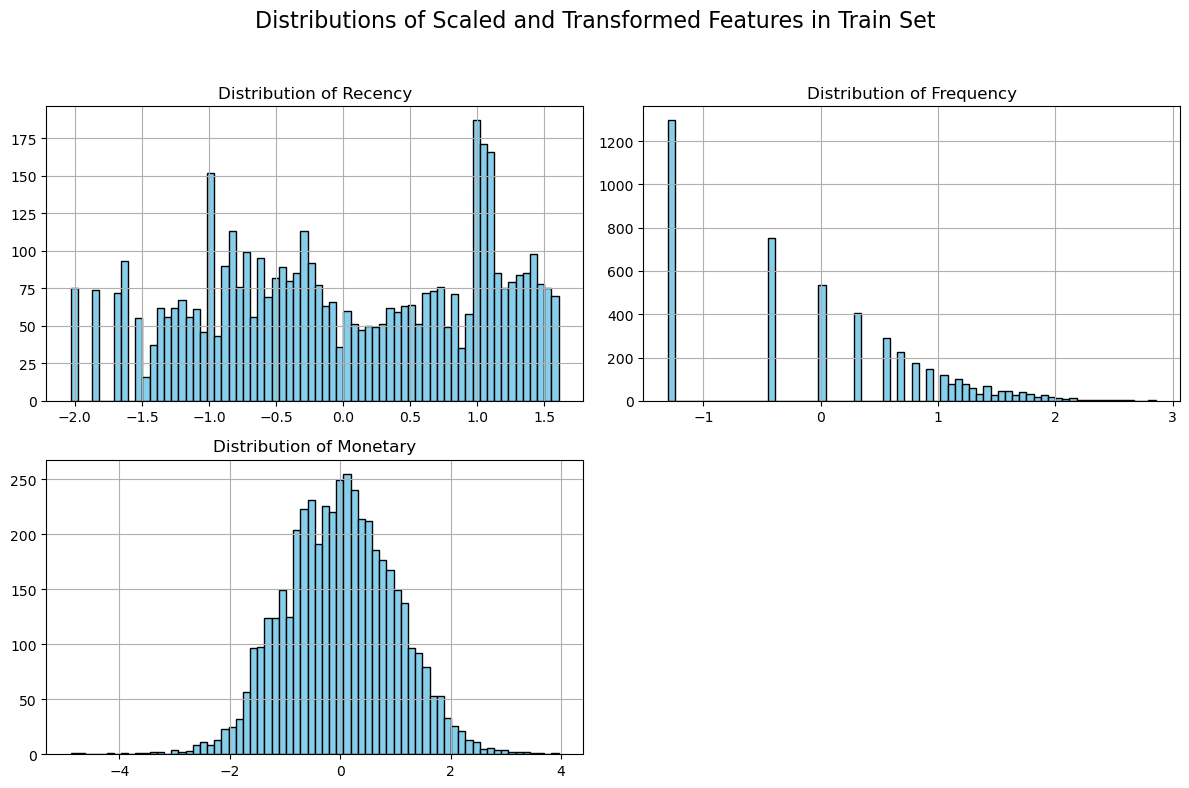

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example: Creating the DataFrame
scaled_transformed_train_df = pd.DataFrame(rfm_train_scaled, columns=['Recency', 'Frequency', 'Monetary'])

# Plot histograms
axes = scaled_transformed_train_df.hist(
    bins=int(np.sqrt(len(scaled_transformed_train_df))), 
    figsize=(12, 8), 
    color='skyblue', 
    edgecolor='black'
)

# Add an overall title to the figure
plt.suptitle('Distributions of Scaled and Transformed Features in Train Set', fontsize=16)

# Optional: Add individual titles for each subplot
for ax, column in zip(axes.flatten(), scaled_transformed_train_df.columns):
    ax.set_title(f'Distribution of {column}')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the suptitle
plt.show()
